In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import layers , models
from keras.datasets import fashion_mnist

# Data Loading


In [ ]:
# Load dataset
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
X = np.concatenate([train_X, test_X], axis=0)
y = np.concatenate([train_Y, test_Y], axis=0)
print("Shape X:", X.shape)
print("Shape Y:", y.shape)

Shape X: (70000, 28, 28)
Shape Y: (70000,)


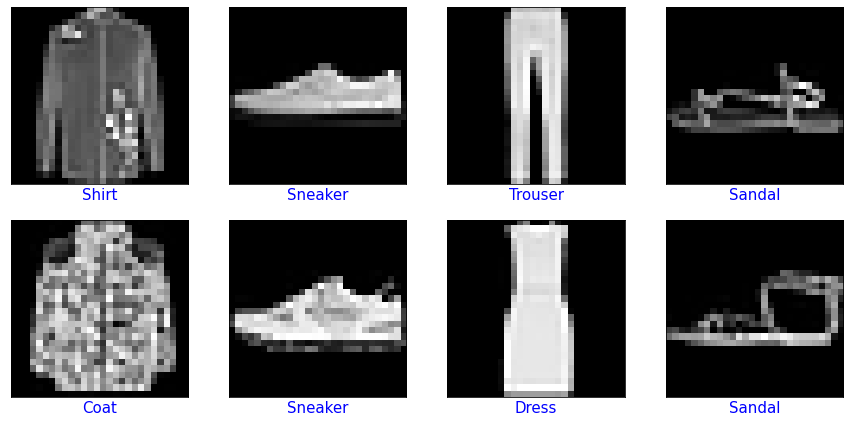

In [ ]:
#Display image from datasets
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n = 8
s = np.random.randint(0,train_Y.shape[0]-n)
plt.figure(figsize=(15, 15))
for i in range(s, n+s):
  plt.subplot(440+1+i-s)
  plt.xticks([])
  plt.yticks([])

  plt.xlabel(class_names[train_Y[i]], color='b', fontsize=15)

  plt.imshow(train_X[i], cmap='gist_gray')
plt.show()

In [ ]:
# plot a few gray images on dataset
def show_images(images, title_texts):
    cols = 10
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

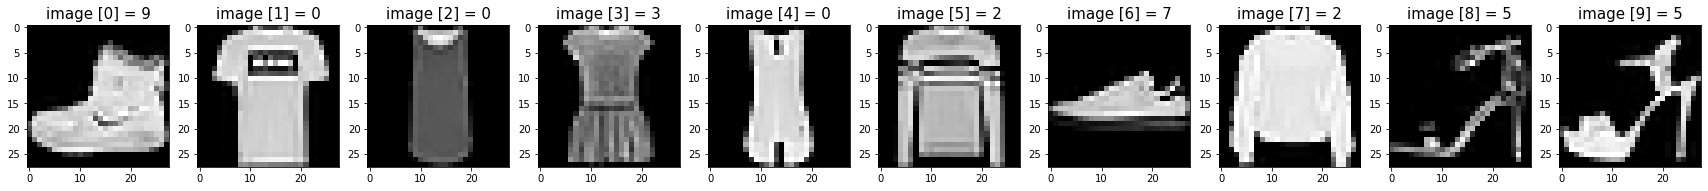

In [ ]:
import random
images_show = []
titles_show = []
for i in range(0, 10):
    images_show.append(X[i])
    titles_show.append('image [' + str(i) + '] = ' + str(train_Y[i]))  
show_images(images_show, titles_show)

In [ ]:
# Show y unique
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


# Build CNN model for feture extraction

In [ ]:
# Create cnn mode for feture extraction 
def get_extract_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten()) 
    
    return model

In [ ]:
Model = get_extract_model()
Model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 dropout_18 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 64)        18496     
                                                      

In [ ]:
# Convert to pandas, reorganize images
Tshirt_Top=[]
Trouser=[]
Pullover=[]
Dress=[]
Coat=[]
Sandal=[]
Shirt=[]
Sneaker=[]
Bag=[]
AnkleBoot=[]


Fashion_List=[Tshirt_Top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,AnkleBoot]


# Get index
for index in range(int(len(test_Y))):
    
    if test_Y[index] == 0 :
        Fashion_List[0].append(test_X[index])
        
    elif test_Y[index] == 1 :
        Fashion_List[1].append(test_X[index])
        
    elif test_Y[index] == 2 :
        Fashion_List[2].append(test_X[index])
        
    elif test_Y[index] == 3 :
        Fashion_List[3].append(test_X[index])
        
    elif test_Y[index] == 4 :    
        Fashion_List[4].append(test_X[index])
        
    elif test_Y[index] == 5 :
        Fashion_List[5].append(test_X[index])
        
    elif test_Y[index] == 6 :
        Fashion_List[6].append(test_X[index])
        
    elif test_Y[index] == 7 :
        Fashion_List[7].append(test_X[index])
        
    elif test_Y[index] == 8 :
        Fashion_List[8].append(test_X[index])
        
    elif test_Y[index] == 9 :
        Fashion_List[9].append(test_X[index])
   
    
 # Convert list of products to pandas   
data_frame = pd.DataFrame({'Tshirt/Top':Fashion_List[0] , 'Trouser':Fashion_List[1], 'Pullover': Fashion_List[2], 'Dress':Fashion_List[3],
                  'Coat': Fashion_List[4], 'Sandal':Fashion_List[5], 'Shirt': Fashion_List[6], 'Sneaker':Fashion_List[7],
                  'Bag': Fashion_List[8], 'Ankle_boot': Fashion_List[9]})



print("Len=", len(data_frame))
data_frame.head()

Len= 1000


,Tshirt/Top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 192, 115, 27,...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 67, 177, 129, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 67, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 35, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 17, 0, 35, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 57, 67, 73,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 143, 82, 9, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 123, 108, 99,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 100, 132, 103...","[[0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 0, 51, 148,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 145, 190, 9...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 94, 151,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 49, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 192, 188, 181,...","[[0, 0, 0, 0, 0, 0, 0, 0, 24, 173, 222, 224, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 154, 36, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 101, 117...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 106, 139...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 11...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 23, 155, 156,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 83, 187, 100, 45,...","[[0, 0, 0, 0, 0, 0, 1, 0, 0, 27, 10, 0, 2, 2, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 26, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 115, 192...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 81, 118,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 26, 64, 134, 75, 1, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 143, 156, 175,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 26, 10, 5, 5, 5, 3, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 19, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 105, 92, 10...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


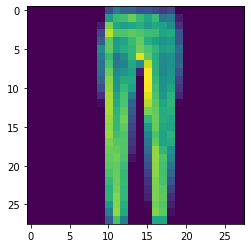

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data_frame["Trouser"][100],interpolation='nearest')
plt.show()

In [ ]:
# convert images to vectors and extract features

def feature_extraction(data):
    vectors = []
    for i in data :
        img = i.reshape(1,28,28,1)
        vector = Model.predict(img)[0]
        vectors.append(vector)
    return vectors

In [ ]:
vector_top = feature_extraction(data_frame['Tshirt/Top'])
vector_trouser = feature_extraction(data_frame['Trouser'])
vector_pullover = feature_extraction(data_frame['Pullover'])
vector_dress = feature_extraction(data_frame['Dress'])
vector_coat = feature_extraction(data_frame['Coat'])
vector_sandal = feature_extraction(data_frame['Sandal'])
vector_shirt = feature_extraction(data_frame['Shirt'])
vector_sneaker = feature_extraction(data_frame['Sneaker'])
vector_bag = feature_extraction(data_frame['Bag'])
vector_ankle_boot = feature_extraction(data_frame['Ankle_boot'])

# Save vectors to Pandas
df_vector = pd.DataFrame({'Tshirt/Top': vector_top, 'Trouser': vector_trouser, 'Pullover': vector_pullover,
                          'Dress': vector_dress, 'Coat': vector_coat, 'Sandal': vector_sandal, 
                          'Shirt': vector_shirt, 'Sneaker': vector_sneaker, 'Bag': vector_bag, 
                          'Ankle_boot': vector_ankle_boot})
df_vector.head()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step


,Tshirt/Top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,"[2.911275, 0.0, 0.0, 0.0, 3.0094807, 0.0, 3.04...","[0.112751156, 0.13382505, 0.0, 0.0, 0.44820225...","[3.1527605, 0.0, 0.0, 0.0, 2.2088614, 0.0, 5.2...","[0.19093522, 0.09760121, 0.0, 0.0, 0.0, 0.1095...","[0.4402522, 0.03317669, 0.0, 0.0, 0.56237936, ...","[0.0014355062, 0.027541887, 0.0, 0.0, 0.025052...","[1.2962632, 0.0, 0.0, 0.0, 1.0500499, 0.0, 2.1...","[0.0025357106, 0.021792043, 0.00018291327, 0.0...","[1.0182474, 0.15268585, 0.0, 0.0, 1.4582713, 0...","[0.00010089626, 0.00040018646, 0.0, 0.0, 0.000..."
1,"[0.23894879, 0.0, 0.0, 0.0, 0.88519454, 0.1878...","[0.16916694, 0.010276236, 0.0, 0.0, 0.50609255...","[1.1829858, 0.0, 0.0, 0.0, 1.6674885, 0.0, 2.0...","[0.29682982, 0.0, 0.0, 0.0, 0.47937834, 0.0838...","[1.4010562, 0.0, 0.0, 0.0, 1.2196302, 0.0, 2.1...","[0.00075955567, 0.0010279887, 0.0, 6.470733e-0...","[1.383032, 0.0, 0.0, 0.0, 0.89058393, 0.0, 2.3...","[0.3358943, 0.16644253, 0.0, 0.0043851635, 0.2...","[0.40123764, 0.21027309, 0.0, 0.0, 0.14569218,...","[0.004150088, 0.0059640054, 0.0007962766, 0.0,..."
2,"[0.94246536, 0.015351355, 0.0, 0.0, 1.0448385,...","[0.21615689, 0.042356282, 0.0, 0.0, 0.42009515...","[3.6779108, 0.0, 0.0, 0.0, 3.2314749, 0.0, 4.5...","[0.08175987, 0.031699598, 0.0, 0.0, 0.04430305...","[1.396241, 0.07913554, 0.0, 0.0, 1.7576789, 0....","[0.0046391077, 0.017328989, 0.0, 0.001364674, ...","[1.789537, 0.07026377, 0.0, 0.0, 1.289754, 0.0...","[0.00545357, 0.006262756, 0.0001460799, 0.0003...","[0.06414929, 0.05178568, 0.0, 0.0038248487, 0....","[0.0024571687, 0.0007237715, 5.6365934e-08, 6...."
3,"[1.1772022, 0.0, 0.0, 0.0, 0.9863672, 0.0, 1.5...","[0.113539234, 0.0, 0.0, 0.0, 0.5801277, 0.2599...","[1.8944433, 0.0, 0.0, 0.0, 2.3066895, 0.0, 3.0...","[0.5023595, 0.0, 0.0, 0.0, 0.47969618, 0.01412...","[1.9011093, 0.0, 0.0, 0.0, 2.8287177, 0.0, 2.0...","[0.0006310791, 0.018882021, 0.0, 0.0, 0.027835...","[2.3769536, 0.0, 0.0, 0.0, 2.5646362, 0.0, 3.1...","[0.005159861, 0.0098135285, 0.00029159573, 0.0...","[0.27953446, 0.07695462, 0.0, 0.0, 0.41820872,...","[1.7058344e-05, 8.925985e-06, 9.768773e-05, 0...."
4,"[1.8274467, 0.0, 0.0, 0.0, 1.6630796, 0.0, 1.4...","[0.11462811, 0.041039474, 0.0, 0.0, 0.290494, ...","[0.64331144, 0.05392225, 0.0, 0.0, 0.31098533,...","[0.31435883, 0.0, 0.0, 0.0, 0.80723214, 0.0696...","[0.7124226, 0.0, 0.0, 0.0, 0.67082524, 0.14756...","[0.00038483605, 0.012213467, 0.0, 0.0, 0.00706...","[2.3509781, 0.0, 0.0, 0.0, 1.534607, 0.0, 3.55...","[0.0011584654, 0.024759736, 0.0, 3.9301172e-05...","[5.576403, 0.08708596, 0.0, 0.0, 4.362152, 2.2...","[0.0005740822, 0.0018863482, 0.0, 0.0, 0.00299..."


In [ ]:
# Load model from Q1 for classification products
from tensorflow import keras
model1 = keras.models.load_model('/content/drive/MyDrive/Fashion_MNIST_Classification/my_model.h5')

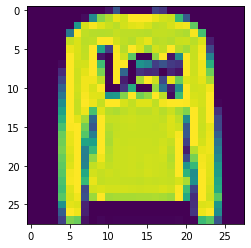

In [ ]:
# show the product you want to find 
index = 1 #  edit index for change product
search_image = test_X[index]
plt.imshow(search_image)
plt.show()

1/1 [==============================] - 0s 23ms/step
Product Type: Pullover
1/1 [==============================] - 0s 16ms/step


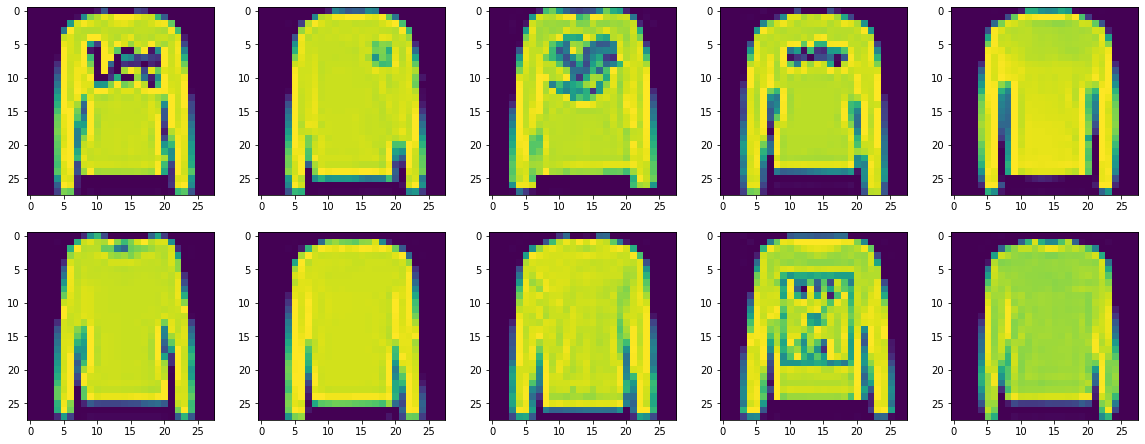

In [ ]:
# Predict the product type
Reshape_img = search_image.reshape(1,28,28,1)
y_pre = model1.predict(Reshape_img)

# Convert predictions classes to one hot vectors 
y_hat = np.argmax(y_pre,axis = 1) 
fashion_names  = ["Tshirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot"]
product = fashion_names[int(y_hat)]
print("Product Type:", product)

#  image feature extraction 
search_vector = Model.predict(Reshape_img)[0]

# calculate the distance from the search vectors to the nearest vectors
vector_product = df_vector[product].tolist()
distance = np.linalg.norm(vector_product - search_vector, axis=1)

# Sort and get the 10 nearest vectors
K = 10
ids = np.argsort(distance)[:K] 

# Show 10 related products
fig = plt.figure(figsize=(20,20))
x=0
for i in ids:
    ax= fig.add_subplot(5,5,x+1)
    x=x+1
    ax.imshow(data_frame[product][i]) #,cmap = plt.cm.bone print image gray
plt.show()